# 第二章 PyTorch简介

## 一、有关Tensor和Autograd变量的练习
### 1. Tensor
#### a. 产生Tensor

In [1]:
import torch
torch.__version__

'1.1.0'

In [2]:
x = torch.rand(5, 3)
x

tensor([[0.7409, 0.0130, 0.1231],
        [0.8028, 0.8240, 0.4109],
        [0.9044, 0.2082, 0.9312],
        [0.9988, 0.9375, 0.5547],
        [0.9289, 0.2690, 0.2895]])

In [3]:
y = torch.ones(5, 3)
y

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [4]:
z = torch.zeros(2, 5, 3)
z

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [5]:
x[1, 2]

tensor(0.4109)

In [6]:
x[:, 2]

tensor([0.1231, 0.4109, 0.9312, 0.5547, 0.2895])

#### b. Tensor的运算

In [7]:
z = x + y
z

tensor([[1.7409, 1.0130, 1.1231],
        [1.8028, 1.8240, 1.4109],
        [1.9044, 1.2082, 1.9312],
        [1.9988, 1.9375, 1.5547],
        [1.9289, 1.2690, 1.2895]])

In [10]:
q = x.mm(y.t())
q

tensor([[0.8770, 0.8770, 0.8770, 0.8770, 0.8770],
        [2.0377, 2.0377, 2.0377, 2.0377, 2.0377],
        [2.0437, 2.0437, 2.0437, 2.0437, 2.0437],
        [2.4911, 2.4911, 2.4911, 2.4911, 2.4911],
        [1.4874, 1.4874, 1.4874, 1.4874, 1.4874]])

#### c. Tensor与numpy.ndarray之间的转换

In [14]:
import numpy as np
a = np.ones([5, 3])
b = torch.from_numpy(a)
print(a)
print(b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [15]:
#另外一种转换为tensor的方法，类型为FloatTensor，还可以使LongTensor，整型数据类型
c = torch.FloatTensor(a)
c

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [16]:
b.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### d.tensor和numpy的最大区别在于tensor可以在GPU上运算

In [17]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(x + y)

In [18]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

### 2. 有关自动微分变量

In [19]:
#创建一个Variable，包裹了一个2*2张量，将需要计算梯度属性置为True
x = torch.ones((2, 2), requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [20]:
y = x + 2
y.grad_fn # 父节点

In [21]:
z = y * y
z.grad_fn

In [22]:
# .data可以反回一个Variable所包裹的Tensor
z = torch.mean(y * y)
z.data

tensor(9.)

In [23]:
# backward可以实施反向传播算法，并计算所有计算图上叶子节点的导数（梯度）信息。
# 注意，由于z和y都不是叶子节点，所以都没有梯度信息）
z.backward()
print(z.grad)
print(y.grad)
print(x.grad)

None
None
tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


In [24]:
s = torch.tensor([[0.01, 0.02]], requires_grad = True) #创建一个1*2的Variable（1维向量）
x = torch.ones(2, 2, requires_grad = True) #创建一个2*2的矩阵型Variable
for i in range(10):
    s = s.mm(x)  #反复用s乘以x（矩阵乘法），注意s始终是1*2的Variable
z = torch.mean(s) #对s中的各个元素求均值，得到一个1*1的scalar（标量，即1*1张量）

In [25]:
z.backward() #在具有很长的依赖路径的计算图上用反向传播算法计算叶节点的梯度
print(x.grad)  #x作为叶节点可以获得这部分梯度信息
print(s.grad)  #s不是叶节点，没有梯度信息

tensor([[37.1200, 37.1200],
        [39.6800, 39.6800]])
None


## 二、利用PyTorch实现简单的线性回归算法

### 1.准备数据

In [29]:
x = torch.linspace(0, 100).type(torch.FloatTensor)
rand = torch.randn(100) *  10
y = x + rand

In [30]:
x_train = x[:-10]
y_train = y[:-10]
x_test = x[-10:]
y_test = y[-10:]

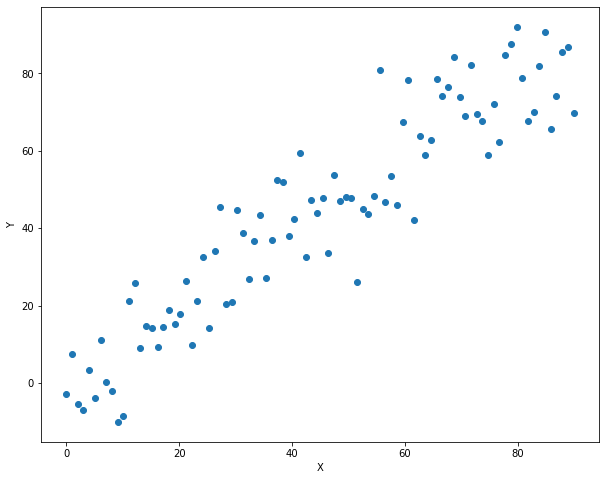

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 2. 构造模型，计算损失函数

In [37]:
a = torch.randn(1, requires_grad = True)
b = torch.randn(1, requires_grad = True)
predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
predictions

tensor([  1.9261,   3.1393,   4.3526,   5.5658,   6.7790,   7.9923,   9.2055,
         10.4188,  11.6320,  12.8452,  14.0585,  15.2717,  16.4849,  17.6982,
         18.9114,  20.1247,  21.3379,  22.5511,  23.7644,  24.9776,  26.1909,
         27.4041,  28.6173,  29.8306,  31.0438,  32.2571,  33.4703,  34.6835,
         35.8968,  37.1100,  38.3232,  39.5365,  40.7497,  41.9630,  43.1762,
         44.3894,  45.6027,  46.8159,  48.0292,  49.2424,  50.4556,  51.6689,
         52.8821,  54.0954,  55.3086,  56.5218,  57.7351,  58.9483,  60.1616,
         61.3748,  62.5880,  63.8013,  65.0145,  66.2277,  67.4410,  68.6542,
         69.8675,  71.0807,  72.2939,  73.5072,  74.7204,  75.9336,  77.1469,
         78.3601,  79.5734,  80.7866,  81.9998,  83.2131,  84.4263,  85.6396,
         86.8528,  88.0660,  89.2793,  90.4925,  91.7058,  92.9190,  94.1322,
         95.3455,  96.5587,  97.7719,  98.9852, 100.1984, 101.4117, 102.6249,
        103.8381, 105.0514, 106.2646, 107.4779, 108.6911, 109.90

In [38]:
loss = torch.mean((predictions - y_train) ** 2)
loss.backward()

In [43]:
a.data.add_(- 0.001 * a.grad.data)
b.data.add_(- 0.001 * b.grad.data)

tensor([1.9017])

### 3. 训练模型的代码

In [71]:
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
learning_rate = 0.0001
print('Initial parameters:', [a, b])
for i in range(1000):
    predictions = x_train * a.expand_as(x_train) + b.expand_as(x_train)
    loss = torch.mean((predictions - y_train) ** 2)
    print('loss:', loss)
    loss.backward()
    a.data.add_(- learning_rate * a.grad.data)
    b.data.add_(- learning_rate * b.grad.data)
    a.grad.data.zero_()
    b.grad.data.zero_()

Initial parameters: [tensor([0.2751], requires_grad=True), tensor([0.8945], requires_grad=True)]
loss: tensor(1377.0356, grad_fn=<MeanBackward0>)
loss: tensor(370.3481, grad_fn=<MeanBackward0>)
loss: tensor(159.1487, grad_fn=<MeanBackward0>)
loss: tensor(114.8398, grad_fn=<MeanBackward0>)
loss: tensor(105.5439, grad_fn=<MeanBackward0>)
loss: tensor(103.5936, grad_fn=<MeanBackward0>)
loss: tensor(103.1844, grad_fn=<MeanBackward0>)
loss: tensor(103.0985, grad_fn=<MeanBackward0>)
loss: tensor(103.0804, grad_fn=<MeanBackward0>)
loss: tensor(103.0766, grad_fn=<MeanBackward0>)
loss: tensor(103.0757, grad_fn=<MeanBackward0>)
loss: tensor(103.0755, grad_fn=<MeanBackward0>)
loss: tensor(103.0754, grad_fn=<MeanBackward0>)
loss: tensor(103.0753, grad_fn=<MeanBackward0>)
loss: tensor(103.0753, grad_fn=<MeanBackward0>)
loss: tensor(103.0752, grad_fn=<MeanBackward0>)
loss: tensor(103.0752, grad_fn=<MeanBackward0>)
loss: tensor(103.0751, grad_fn=<MeanBackward0>)
loss: tensor(103.0751, grad_fn=<MeanBa

loss: tensor(103.0635, grad_fn=<MeanBackward0>)
loss: tensor(103.0635, grad_fn=<MeanBackward0>)
loss: tensor(103.0634, grad_fn=<MeanBackward0>)
loss: tensor(103.0633, grad_fn=<MeanBackward0>)
loss: tensor(103.0633, grad_fn=<MeanBackward0>)
loss: tensor(103.0632, grad_fn=<MeanBackward0>)
loss: tensor(103.0632, grad_fn=<MeanBackward0>)
loss: tensor(103.0631, grad_fn=<MeanBackward0>)
loss: tensor(103.0631, grad_fn=<MeanBackward0>)
loss: tensor(103.0630, grad_fn=<MeanBackward0>)
loss: tensor(103.0630, grad_fn=<MeanBackward0>)
loss: tensor(103.0629, grad_fn=<MeanBackward0>)
loss: tensor(103.0628, grad_fn=<MeanBackward0>)
loss: tensor(103.0628, grad_fn=<MeanBackward0>)
loss: tensor(103.0627, grad_fn=<MeanBackward0>)
loss: tensor(103.0627, grad_fn=<MeanBackward0>)
loss: tensor(103.0626, grad_fn=<MeanBackward0>)
loss: tensor(103.0626, grad_fn=<MeanBackward0>)
loss: tensor(103.0625, grad_fn=<MeanBackward0>)
loss: tensor(103.0624, grad_fn=<MeanBackward0>)
loss: tensor(103.0624, grad_fn=<MeanBack

loss: tensor(103.0539, grad_fn=<MeanBackward0>)
loss: tensor(103.0538, grad_fn=<MeanBackward0>)
loss: tensor(103.0538, grad_fn=<MeanBackward0>)
loss: tensor(103.0537, grad_fn=<MeanBackward0>)
loss: tensor(103.0537, grad_fn=<MeanBackward0>)
loss: tensor(103.0536, grad_fn=<MeanBackward0>)
loss: tensor(103.0536, grad_fn=<MeanBackward0>)
loss: tensor(103.0535, grad_fn=<MeanBackward0>)
loss: tensor(103.0534, grad_fn=<MeanBackward0>)
loss: tensor(103.0534, grad_fn=<MeanBackward0>)
loss: tensor(103.0533, grad_fn=<MeanBackward0>)
loss: tensor(103.0533, grad_fn=<MeanBackward0>)
loss: tensor(103.0532, grad_fn=<MeanBackward0>)
loss: tensor(103.0532, grad_fn=<MeanBackward0>)
loss: tensor(103.0531, grad_fn=<MeanBackward0>)
loss: tensor(103.0531, grad_fn=<MeanBackward0>)
loss: tensor(103.0530, grad_fn=<MeanBackward0>)
loss: tensor(103.0529, grad_fn=<MeanBackward0>)
loss: tensor(103.0529, grad_fn=<MeanBackward0>)
loss: tensor(103.0529, grad_fn=<MeanBackward0>)
loss: tensor(103.0528, grad_fn=<MeanBack

loss: tensor(103.0442, grad_fn=<MeanBackward0>)
loss: tensor(103.0442, grad_fn=<MeanBackward0>)
loss: tensor(103.0441, grad_fn=<MeanBackward0>)
loss: tensor(103.0440, grad_fn=<MeanBackward0>)
loss: tensor(103.0440, grad_fn=<MeanBackward0>)
loss: tensor(103.0439, grad_fn=<MeanBackward0>)
loss: tensor(103.0439, grad_fn=<MeanBackward0>)
loss: tensor(103.0438, grad_fn=<MeanBackward0>)
loss: tensor(103.0438, grad_fn=<MeanBackward0>)
loss: tensor(103.0437, grad_fn=<MeanBackward0>)
loss: tensor(103.0437, grad_fn=<MeanBackward0>)
loss: tensor(103.0436, grad_fn=<MeanBackward0>)
loss: tensor(103.0436, grad_fn=<MeanBackward0>)
loss: tensor(103.0435, grad_fn=<MeanBackward0>)
loss: tensor(103.0435, grad_fn=<MeanBackward0>)
loss: tensor(103.0434, grad_fn=<MeanBackward0>)
loss: tensor(103.0434, grad_fn=<MeanBackward0>)
loss: tensor(103.0433, grad_fn=<MeanBackward0>)
loss: tensor(103.0432, grad_fn=<MeanBackward0>)
loss: tensor(103.0432, grad_fn=<MeanBackward0>)
loss: tensor(103.0432, grad_fn=<MeanBack

loss: tensor(103.0323, grad_fn=<MeanBackward0>)
loss: tensor(103.0323, grad_fn=<MeanBackward0>)
loss: tensor(103.0322, grad_fn=<MeanBackward0>)
loss: tensor(103.0322, grad_fn=<MeanBackward0>)
loss: tensor(103.0321, grad_fn=<MeanBackward0>)
loss: tensor(103.0321, grad_fn=<MeanBackward0>)
loss: tensor(103.0320, grad_fn=<MeanBackward0>)
loss: tensor(103.0320, grad_fn=<MeanBackward0>)
loss: tensor(103.0319, grad_fn=<MeanBackward0>)
loss: tensor(103.0319, grad_fn=<MeanBackward0>)
loss: tensor(103.0318, grad_fn=<MeanBackward0>)
loss: tensor(103.0318, grad_fn=<MeanBackward0>)
loss: tensor(103.0317, grad_fn=<MeanBackward0>)
loss: tensor(103.0317, grad_fn=<MeanBackward0>)
loss: tensor(103.0316, grad_fn=<MeanBackward0>)
loss: tensor(103.0315, grad_fn=<MeanBackward0>)
loss: tensor(103.0315, grad_fn=<MeanBackward0>)
loss: tensor(103.0314, grad_fn=<MeanBackward0>)
loss: tensor(103.0314, grad_fn=<MeanBackward0>)
loss: tensor(103.0313, grad_fn=<MeanBackward0>)
loss: tensor(103.0313, grad_fn=<MeanBack

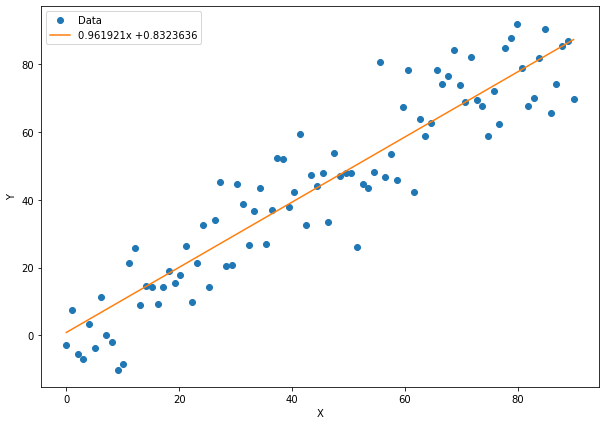

In [72]:
x_data = x_train.data.numpy()
plt.figure(figsize=(10, 7))
xplot, = plt.plot(x_data, y_train.numpy(), 'o')# 逗号解元组
yplot, = plt.plot(x_data, x_data * a.data.numpy() + b.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
plt.legend([xplot, yplot],['Data', str1])
plt.show()

### 3. 测试阶段

In [73]:
predictions = x_test * a.data.numpy()[0] + b.data.numpy()[0]
predictions

tensor([88.2797, 89.2514, 90.2230, 91.1946, 92.1663, 93.1379, 94.1096, 95.0812,
        96.0528, 97.0245])

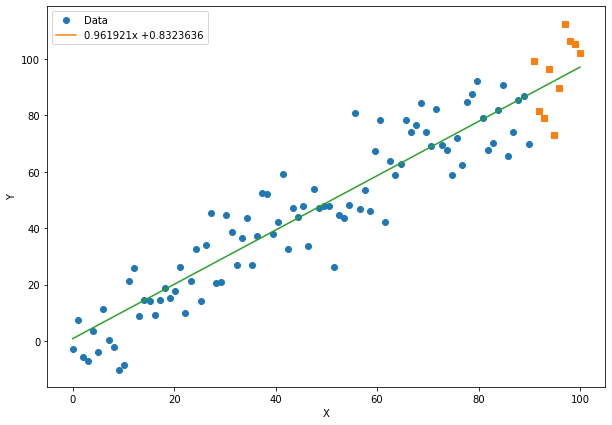

In [80]:
x_data = x_train.data.numpy()
x_pred = x_test.data.numpy()
plt.figure(figsize=(10, 7))
plt.plot(x_data, y_train.data.numpy(), 'o')
plt.plot(x_pred, y_test.data.numpy(), 's')
x_data = np.r_[x_data, x_pred]
plt.plot(x_data, x_data * a.data.numpy()[0] + b.data.numpy()[0])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot, yplot], ['Data', str1])
plt.show()